<a href="https://colab.research.google.com/github/18520076Khiem/CS114.K21/blob/master/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danh sách thành viên
18521404 Lê Đại Thành


18520076 Trần Đỗ Quốc Khiêm

185212394 Nguyễn Hoàng Thắng

# Mô tả bài toán
Phát biểu bài toán: Dựa vào tiêu đề của một bài báo, đưa ra dự đoán liệu nó có phải là một bài báo châm biếm hay không.

Data: Lấy các tiêu đề bài báo có tính châm biếm từ trang web theOnion. Tiêu đề bài báo không có tính châm biếm lấy tại trang web HUFFPOST

Input: Tiêu đề của bài báo.

Output: Bài báo có tính châm biếm hay không

# Lấy datasets trên Kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trandoquockhiem","key":"94f23ee7b4ed300f910aada801fc5b46"}'}

In [5]:
!pip install kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list -s headlines

ref                                                  title                                          size  lastUpdated          downloadCount  
---------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  
therohk/million-headlines                            A Million News Headlines                       20MB  2020-04-27 13:07:30           1271  
rmisra/news-headlines-dataset-for-sarcasm-detection  News Headlines Dataset For Sarcasm Detection    3MB  2019-07-03 23:52:57           9569  
therohk/india-headlines-news-dataset                 India Headlines News Dataset                   68MB  2019-04-12 02:46:04           1989  
aaron7sun/stocknews                                  Daily News for Stock Market Prediction          6MB  2019-11-13 18:22:52           4167  
rmisra/news-category-dataset                         News Category Dataset                          25MB  2018-12-02 04:09:45          11489  

In [8]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

  0% 0.00/3.30M [00:00<?, ?B/s]
100% 3.30M/3.30M [00:00<00:00, 111MB/s]


In [9]:
!unzip news-headlines-dataset-for-sarcasm-detection.zip

Archive:  news-headlines-dataset-for-sarcasm-detection.zip
  inflating: Sarcasm_Headlines_Dataset.json  
  inflating: Sarcasm_Headlines_Dataset_v2.json  


In [10]:
ls

drive/
kaggle.json
news-headlines-dataset-for-sarcasm-detection.zip
sample_data/
Sarcasm_Headlines_Dataset.json
Sarcasm_Headlines_Dataset_v2.json


In [11]:
import pandas as pd
df1=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
df2=pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)

In [12]:
df=pd.concat([df1,df2],axis=0,sort=False)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


# Lấy dữ liệu cột Headline và cột Is_sarcastic

In [13]:
X=df['headline']
y=df['is_sarcastic']

# Biểu đồ thống kê số tiêu đề là châm biếm và không châm biếm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Data Distribution')

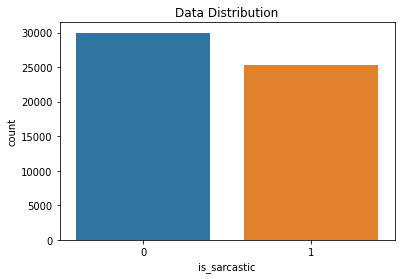

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "is_sarcastic", data = df)
plt.title("Data Distribution")

# Tiền xử lí dữ liệu

## Stopword là gì? 

Stopword là những từ trong câu khi mất đi không gây ảnh hưởng đến nghĩa của câu.
 

Những stopword này đã được thống kê trong corpus của thư viện nltk.

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Xóa những stopwords ra khỏi data:

In [16]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

stop_words =set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import PorterStemmer 

def preprocess(text):
  word_list = []
  tok = tokenizer.tokenize(text)
  for word in tok:
    if word not in stop_words:
      word_list.append(stemmer.stem(word))
  return " ".join(word_list)

Tiến hành xóa những stopwords ra khỏi Data

In [35]:
x_data = df["headline"].apply(preprocess)
x_data.tail()

28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci g...
28616          beauti accept speech week came queer korean
28617    mar probe destroy orbit spielberg gate space p...
28618                                dad clarifi food stop
Name: headline, dtype: object

## Xử lí dữ liệu chuyển đổi ngôn ngữ tự nhiên thành  thành ma trận các tính năng TF-IDF 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_data_tfidf=vectorizer.fit_transform(x_data)
x_data_tfidf

<55328x17940 sparse matrix of type '<class 'numpy.float64'>'
	with 394323 stored elements in Compressed Sparse Row format>

## Chia dữ liệu thành 80% để train 20% để test

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data_tfidf, df['is_sarcastic'].values, test_size=0.10, random_state=42)

## Chọn model để train cho data

In [38]:
from sklearn.linear_model import LogisticRegression
LogModel = LogisticRegression()
LogModel.fit(x_train_tfidf,y_train)
print(f"Training Score : {LogModel.score(x_train_tfidf, y_train)}")
print(f"Test Score : {LogModel.score(x_test_tfidf, y_test)}")


Training Score : 0.890691836529772
Test Score : 0.8458340863907464


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
dataf=pd.read_csv('/content/drive/My Drive/Sarcasm/headlines_data.xlsx',header=None)
dataf.columns=['headline','is_sacartic']
print(dataf)

                                               headline  is_sacartic
0     White House Announces Entire U.S. Populace Of ...            1
1     Facebook Announces Plan To Break Up U.S. Gover...            1
2     Dog Owner Not Sure How City Expects Her To Pic...            1
3     Public Pressure Mounts For U.S. Government To ...            1
4     Huh, Boyfriend’s Ex Just Made Interesting Hair...            1
...                                                 ...          ...
3195  Coronavirus: UK Excluded From Donald Trump's 3...            0
3196  The Magic Money Tree From The Budget Has Left ...            0
3197  Coronavirus Officially Declared A Pandemic By ...            0
3198  What It’s Like To Be On Coronavirus Lockdown I...            0
3199  Harvey Weinstein Jailed For 23 Years After Rap...            0

[3200 rows x 2 columns]


In [28]:
x1_test=dataf['headline'].apply(preprocess)
x1_test

0       white hous announc entir U S populac Of 6 200 ...
1       facebook announc plan To break Up U S govern b...
2       dog owner not sure how citi expect her To pick...
3       public pressur mount for U S govern To stop de...
4          huh boyfriend Ex just made interest hair choic
                              ...                        
3195    coronaviru UK exclud from donald trump 30 day ...
3196    the magic money tree from the budget ha left w...
3197    coronaviru offici declar A pandem By the world...
3198    what It like To Be On coronaviru lockdown In i...
3199    harvey weinstein jail for 23 year after rape c...
Name: headline, Length: 3200, dtype: object

In [29]:
x1_test_tfidf = vectorizer.transform(x1_test)
x1_test_tfidf

<3200x17814 sparse matrix of type '<class 'numpy.float64'>'
	with 29060 stored elements in Compressed Sparse Row format>

In [30]:
print(x1_test_tfidf)

  (0, 17379)	0.23931346727317712
  (0, 16300)	0.47774916532190975
  (0, 16261)	0.16790785409675363
  (0, 12738)	0.320989185992709
  (0, 12145)	0.3889300040501126
  (0, 7605)	0.2341807999895165
  (0, 5316)	0.2839171154860191
  (0, 1217)	0.3218807818304177
  (0, 913)	0.2634724133060277
  (0, 133)	0.3514493143244903
  (1, 16744)	0.47811257759444376
  (1, 12226)	0.3294694099141416
  (1, 11971)	0.2972222574056235
  (1, 6749)	0.3478783342390931
  (1, 5605)	0.3483564914366993
  (1, 2201)	0.3263348645897307
  (1, 1618)	0.34908168489552716
  (1, 913)	0.3221694486511383
  (2, 16744)	0.3094184883798484
  (2, 15407)	0.2380048315982677
  (2, 11943)	0.28581657622482504
  (2, 11885)	0.2402963365857043
  (2, 11411)	0.23564501883439132
  (2, 9264)	0.21037259575624695
  (2, 7873)	0.3923674205055597
  :	:
  (3195, 871)	0.45799397020161153
  (3195, 218)	0.281044252217538
  (3196, 17528)	0.26896502149774953
  (3196, 16177)	0.3772027200792349
  (3196, 11283)	0.5229787843255652
  (3196, 10338)	0.322114430391

In [31]:
y1_test=dataf['is_sacartic']
y1_test.shape

(3200,)

In [33]:
print(f"Training Score : {LogModel.score(x_train_tfidf, y_train)}")
print(f"Test Score : {LogModel.score(x1_test_tfidf, y1_test)}")

Training Score : 0.890691836529772
Test Score : 0.74375
